In [104]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib widget

### Linear regression

In [105]:
x = pd.read_csv('data/smallFishInput.dt', header=None)
x = x[x.columns[0]].str.split(' ', expand=True).astype(int)
x.rename(columns={x.columns[0]: 'age'}, inplace=True)
x.rename(columns={x.columns[1]: 'temperature'}, inplace=True)

y = pd.read_csv('data/smallFishLabel.dt', header=None, dtype=int)
y.rename(columns={y.columns[0]: 'length'}, inplace=True)

Visualizing the data

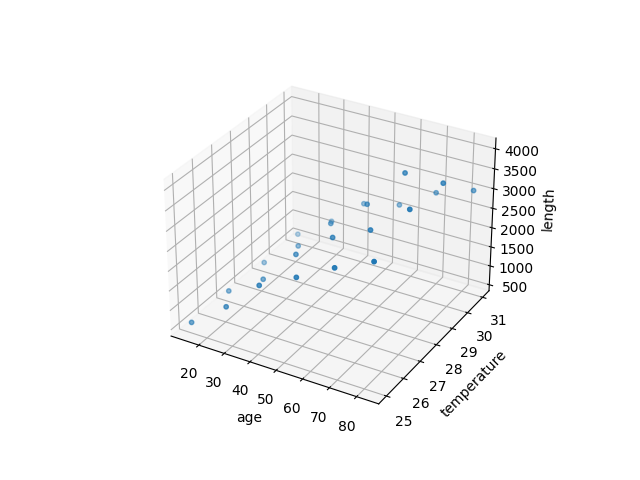

In [106]:
fig = plt.figure()
#ax = Axes3D(fig)
ax = plt.axes(projection ='3d')
a = x['temperature'].ravel()
ax.scatter(x['age'], x['temperature'], y['length'], s=10)
ax.set_xlabel('age')
ax.set_ylabel('temperature')
ax.set_zlabel('length')
plt.show()

Affine Linear Transformation

In [112]:
def plot(x, pred, score):
    fig = plt.figure()
    plt.title("Test set performance\nTest score: %.3f"%(score))
    #ax = Axes3D(fig)
    ax = plt.axes(projection ='3d')
    ax.scatter(x['age'], x['temperature'], y['length'], c='blue', label='Truths')
    ax.scatter(x['age'], x['temperature'], pred, color='k', marker='o', alpha=0.5, label='Predictions')
    ax.set_xlabel('age')
    ax.set_ylabel('temperature')
    ax.set_zlabel('length')
    plt.legend()
    plt.show()

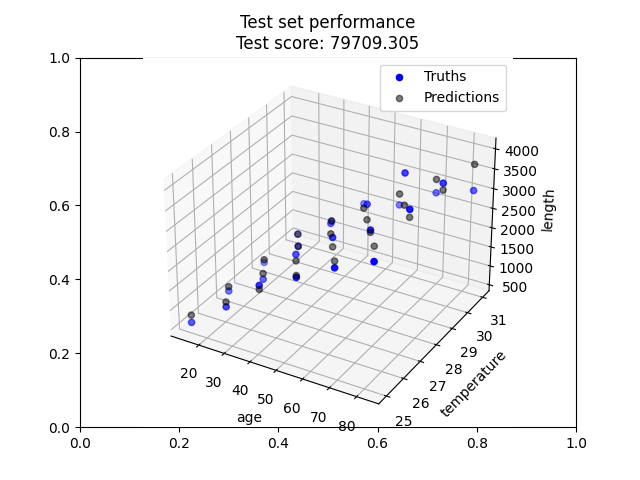

In [115]:
model = LinearRegression(fit_intercept=True)
model.fit(x, y) 

pred = model.predict(x)
r2 = r2_score(y, pred)
mse = mean_squared_error(y, pred)
xy = pd.concat([x['age'], x['temperature']], axis=1)
variances = np.var(y)
variance = np.sum(variances)

coefs = model.coef_
intercept = model.intercept_

plot(x, pred, mse);